In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv('/content/yellow_tripdata_2015-01.csv')

In [5]:
df.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,1,N,-73.974785,40.750618,1.0,12.0,1.0,0.5,3.25,0.0,0.3,17.05
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,1,N,-73.994415,40.759109,1.0,14.5,0.5,0.5,2.00,0.0,0.3,17.80
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,1,N,-73.951820,40.824413,2.0,9.5,0.5,0.5,0.00,0.0,0.3,10.80
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,1,N,-74.004326,40.719986,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,1,N,-74.004181,40.742653,2.0,15.0,0.5,0.5,0.00,0.0,0.3,16.30


In [6]:
df.shape

(100968, 19)

In [7]:
df.isna().sum()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
pickup_longitude,0
pickup_latitude,0
RateCodeID,0
store_and_fwd_flag,0
dropoff_longitude,1


In [8]:
df = df.dropna()

In [9]:
df.isna().sum()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
pickup_longitude,0
pickup_latitude,0
RateCodeID,0
store_and_fwd_flag,0
dropoff_longitude,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100967 entries, 0 to 100966
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               100967 non-null  int64  
 1   tpep_pickup_datetime   100967 non-null  object 
 2   tpep_dropoff_datetime  100967 non-null  object 
 3   passenger_count        100967 non-null  int64  
 4   trip_distance          100967 non-null  float64
 5   pickup_longitude       100967 non-null  float64
 6   pickup_latitude        100967 non-null  float64
 7   RateCodeID             100967 non-null  int64  
 8   store_and_fwd_flag     100967 non-null  object 
 9   dropoff_longitude      100967 non-null  float64
 10  dropoff_latitude       100967 non-null  float64
 11  payment_type           100967 non-null  float64
 12  fare_amount            100967 non-null  float64
 13  extra                  100967 non-null  float64
 14  mta_tax                100967 non-null  f

In [11]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100967 entries, 0 to 100966
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               100967 non-null  int64         
 1   tpep_pickup_datetime   100967 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  100967 non-null  datetime64[ns]
 3   passenger_count        100967 non-null  int64         
 4   trip_distance          100967 non-null  float64       
 5   pickup_longitude       100967 non-null  float64       
 6   pickup_latitude        100967 non-null  float64       
 7   RateCodeID             100967 non-null  int64         
 8   store_and_fwd_flag     100967 non-null  object        
 9   dropoff_longitude      100967 non-null  float64       
 10  dropoff_latitude       100967 non-null  float64       
 11  payment_type           100967 non-null  float64       
 12  fare_amount            100967 non-null  float64  

In [13]:
from sklearn.preprocessing import LabelEncoder

In [15]:
df['store_and_fwd_flag'] = LabelEncoder().fit_transform(df['store_and_fwd_flag'])

In [16]:
df['store_and_fwd_flag'].unique()

array([0, 1])

In [17]:
df.head(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,1,0,-73.974785,40.750618,1.0,12.0,1.0,0.5,3.25,0.0,0.3,17.05
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,1,0,-73.994415,40.759109,1.0,14.5,0.5,0.5,2.00,0.0,0.3,17.80


In [20]:
import datetime as dt

In [21]:
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_month'] = df['tpep_pickup_datetime'].dt.hour

df['dropoff_hour'] = df['tpep_dropoff_datetime'].dt.hour
df['dropoff_day'] = df['tpep_dropoff_datetime'].dt.hour
df['dropoff_month'] = df['tpep_dropoff_datetime'].dt.hour

In [22]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_hour,pickup_day,pickup_month,dropoff_hour,dropoff_day,dropoff_month
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,1,0,-73.974785,...,3.25,0.0,0.3,17.05,19,19,19,19,19,19
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,1,0,-73.994415,...,2.00,0.0,0.3,17.80,20,20,20,20,20,20
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,1,0,-73.951820,...,0.00,0.0,0.3,10.80,20,20,20,20,20,20
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,1,0,-74.004326,...,0.00,0.0,0.3,4.80,20,20,20,20,20,20
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,1,0,-74.004181,...,0.00,0.0,0.3,16.30,20,20,20,20,20,20


In [23]:
df = df.drop(columns=['tpep_pickup_datetime','tpep_dropoff_datetime'])

In [24]:
df.head()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_hour,pickup_day,pickup_month,dropoff_hour,dropoff_day,dropoff_month
0,2,1,1.59,-73.993896,40.750111,1,0,-73.974785,40.750618,1.0,...,3.25,0.0,0.3,17.05,19,19,19,19,19,19
1,1,1,3.30,-74.001648,40.724243,1,0,-73.994415,40.759109,1.0,...,2.00,0.0,0.3,17.80,20,20,20,20,20,20
2,1,1,1.80,-73.963341,40.802788,1,0,-73.951820,40.824413,2.0,...,0.00,0.0,0.3,10.80,20,20,20,20,20,20
3,1,1,0.50,-74.009087,40.713818,1,0,-74.004326,40.719986,2.0,...,0.00,0.0,0.3,4.80,20,20,20,20,20,20
4,1,1,3.00,-73.971176,40.762428,1,0,-74.004181,40.742653,2.0,...,0.00,0.0,0.3,16.30,20,20,20,20,20,20


In [26]:
numerical_features = df.select_dtypes(include=['int64','float64']).columns
numerical_features

Index(['VendorID', 'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RateCodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')

In [27]:
from sklearn.preprocessing import StandardScaler

In [30]:
df[numerical_features] = StandardScaler().fit_transform(df[numerical_features])

In [31]:
df.shape

(100967, 23)

In [32]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

In [43]:
X = df.sample(100000)

In [44]:
n_samples = len(X)
n_clusters = range(2,11)

In [45]:
n_chunks = 10
chunk_size = n_samples // n_chunks

In [50]:
inertia = []
sil_scores = []

for cluster in n_clusters:
  mbkm = MiniBatchKMeans(n_clusters=cluster,random_state=42,n_init='auto',batch_size=10000)

  for i in range(n_chunks):
    start_index = i * chunk_size
    end_index = (i + 1) * chunk_size if i < (n_chunks - 1) else n_samples

    chunk = X.iloc[start_index:end_index]
    mbkm.partial_fit(chunk)

  labels = mbkm.predict(X)
  inertia.append(mbkm.inertia_)

  sil = silhouette_score(X,labels)
  sil_scores.append(sil)

  print(cluster)


2
3
4
5
6
7
8
9
10


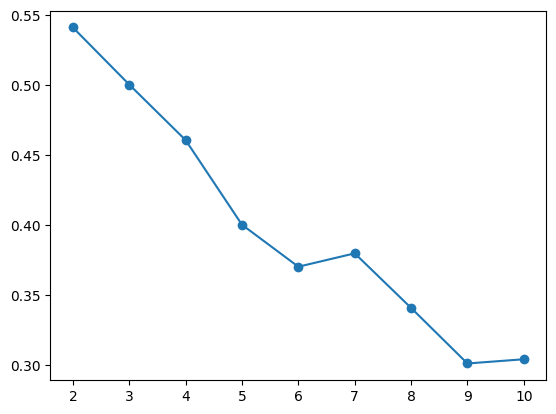

In [52]:
plt.plot(n_clusters[:9],sil_scores[:9],marker='o')

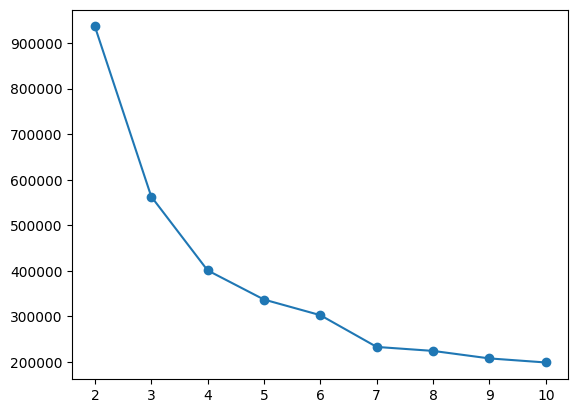

In [53]:
plt.plot(n_clusters[:9],inertia[:9],marker='o')

In [55]:
inertia = []
sil_scores = []

#for cluster in n_clusters:
mbkm = MiniBatchKMeans(n_clusters=7,random_state=42,n_init='auto',batch_size=10000)

for i in range(n_chunks):
  start_index = i * chunk_size
  end_index = (i + 1) * chunk_size if i < (n_chunks - 1) else n_samples

  chunk = X.iloc[start_index:end_index]
  mbkm.partial_fit(chunk)

labels = mbkm.predict(X)
inertia.append(mbkm.inertia_)

sil = silhouette_score(X,labels)
sil_scores.append(sil)

inertia, sil_scores

([233050.38883281106], [0.3799874148818428])